<a href="https://colab.research.google.com/github/ThomasSpare/Garbage_bin_scanner/blob/main/Garabage_bin_scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 13592057.12it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203042.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3664941.81it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16988416.20it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
print(test_data[2])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0000, 0.2627, 0.6941, 0.5059, 0.6000, 0.4588, 0.5059,
          0.5725, 0.5529, 0.6863, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0078, 0.0000, 0.7686, 1.0000, 1.0000, 1.0000, 0.9451, 0.9843,
          1.0000, 0.9608, 1.0000, 0.2980, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.9529, 0.9294, 0.8510, 0.8941, 0.9059, 0.8706,
          0.8549, 0.8588, 1.0000, 0.4549, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 1.0000, 0.9216, 0.9059, 0.9137, 0.8863, 0.8824,
          0.8980, 0.8706, 1.0000, 0.5686, 0.0000, 0.0000

In [ ]:
test_data[4143][0].reshape(28, 28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0196, 0.5176, 0.2471, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275,
         0.4235, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0078, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4824,
         0.9255, 0.8784, 0.9686, 0.9843, 0.8588, 0.8353, 0.8667, 0.8157, 0.9294,
         0.9529, 0.8667, 0.2941, 0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7961, 0.8745,
         0.7961, 0.7882, 0.8549, 0.9176, 0.8000, 0.6941, 0.9373, 0.9176, 0.8392,
         0.7529, 0.8039, 0.9529, 0.3686, 0.0000, 0.0039, 0.0000, 0.0078, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.7490, 0.8314, 0.7569,
         0.7725, 0.7412, 0.8314, 0.8549, 0.9333, 0.9059, 0.8902, 0.8471, 0.8549,
         0.8000, 0.7216, 0.7725, 0.9373, 0.2078, 0.0000

In [ ]:
import matplotlib.pyplot as plt


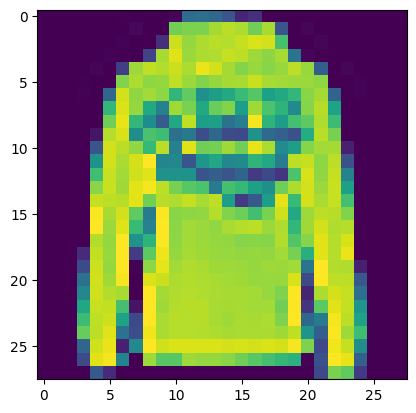

In [ ]:
plt.imshow(test_data[4160][0].reshape(28, 28))

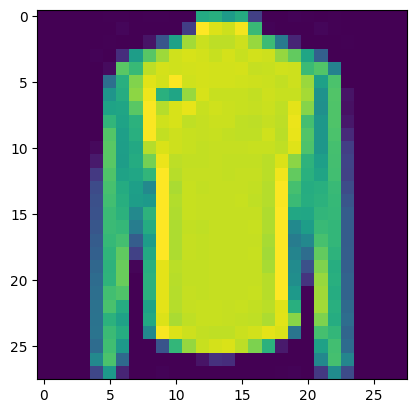

In [ ]:
plt.imshow(test_data[4100][0].reshape(28, 28))

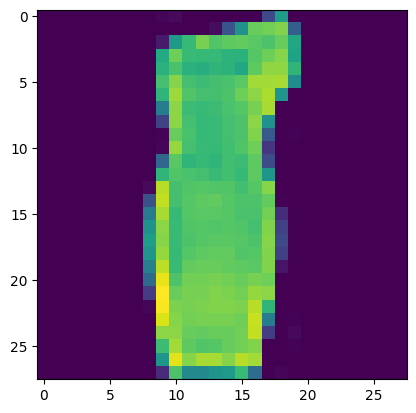

In [ ]:
plt.imshow(test_data[1111][0].reshape(28, 28))

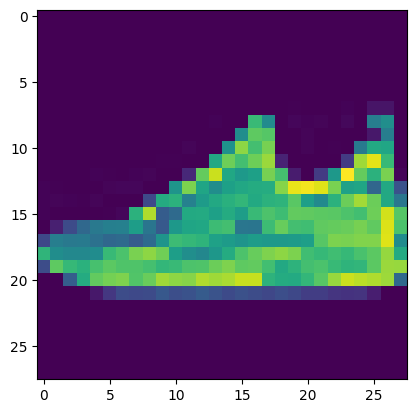

In [ ]:
plt.imshow(test_data[5050][0].reshape(28, 28))

In [ ]:
model.eval()
x, y = test_data[5050][0], test_data[5050][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301970  [   64/60000]
loss: 2.295158  [ 6464/60000]
loss: 2.271685  [12864/60000]
loss: 2.275250  [19264/60000]
loss: 2.245620  [25664/60000]
loss: 2.222655  [32064/60000]
loss: 2.231807  [38464/60000]
loss: 2.198143  [44864/60000]
loss: 2.197961  [51264/60000]
loss: 2.175594  [57664/60000]
Test Error: 
 Accuracy: 49.5%, Avg loss: 2.161692 

Epoch 2
-------------------------------
loss: 2.165958  [   64/60000]
loss: 2.161842  [ 6464/60000]
loss: 2.100431  [12864/60000]
loss: 2.126804  [19264/60000]
loss: 2.069312  [25664/60000]
loss: 2.016623  [32064/60000]
loss: 2.042570  [38464/60000]
loss: 1.966764  [44864/60000]
loss: 1.973653  [51264/60000]
loss: 1.917828  [57664/60000]
Test Error: 
 Accuracy: 58.5%, Avg loss: 1.899862 

Epoch 3
-------------------------------
loss: 1.925992  [   64/60000]
loss: 1.906236  [ 6464/60000]
loss: 1.776479  [12864/60000]
loss: 1.831792  [19264/60000]
loss: 1.724232  [25664/60000]
loss: 1.672667  [32064/600

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [ ]:
model.eval()
x, y = test_data[4100][0], test_data[4100][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Coat", Actual: "Pullover"


In [ ]:
import os
import pandas as pd
from skimage import io, transform
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [2]:
 import matplotlib.image as mpimg
 import matplotlib.pyplot as plt
 import numpy as np
 img=mpimg.imread('/content/IMG_2580.JPG')

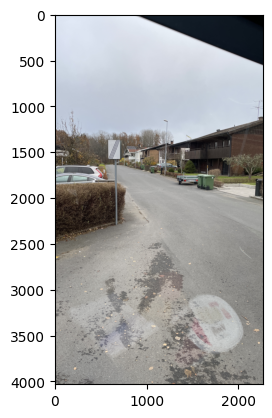

In [4]:
imgplot = plt.imshow(img)

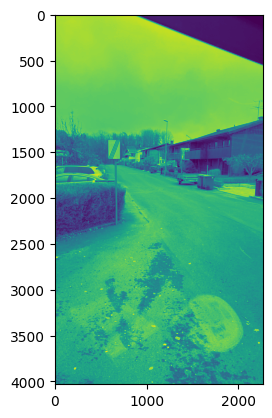

In [3]:
lum_img = img[:,:,0]
plt.imshow(lum_img)

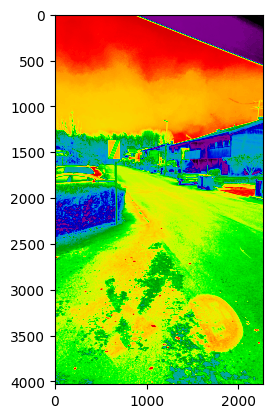

In [7]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

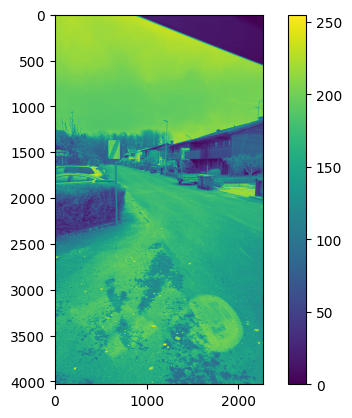

In [8]:
imgplot = plt.imshow(lum_img)
plt.colorbar()